# Julia and JuMP: new tools for Mathematical Programming
Pedro B. Castellucci

<b>The original version, in Portuguese, of this tutorial was published on <i>Pesquisa Operacional para o Desenvolvimento</i>. If you are distributing, modifying or reproducing please cite the original reference:
CASTELLUCCI, Pedro Belin. JULIA E JuMP: NOVAS FERRAMENTAS PARA PROGRAMAÇÃO MATEMÁTICA. Pesquisa Operacional para o Desenvolvimento, [S.l.], v. 9, n. 2, p. 48-61, ago. 2017. ISSN 1984-3534</b>

There are numerous programming languages for general and cientific applications. However, specially for cientific applications, it is usual for languages to be well-suited for some task (e.g. algorithm development) and not efficient for others (e.g. graphics generations for results visualization). Julia was created as an alternative to aggregate advantages of various languages. In this tutorial, we present Julia and JuMP as an option for approaching Mathematical Programming challenges, focusing on Mixed Integer Linear Programming. The JuMP package provides a modelling language which is solver independent, allowing even the use of callback routines. Here, we present installation and an introductory development guide, besides examples with common callbacks.

<b>Keywords: Mixed Integer Linear Programming; Programming language; Modelling language.</b>


# Why Julia and JuMP?

Most programming languagens used in the optimization context usually has disadvantages regarding productivity or performance. As examples from the optimization literature we can cite C/C++ and Python (or Java). Both are opposite extremes  regarding performance and productivity. C/C++ is a language know, in the context of optimization, for allowing the implementation of algorithms with high execution speed, which is important for stablishing state-of-the-art benchmarks. However, it is a languange that requires deep understanding regarding memory hierarchy, memory management, architecture, operating system, leading to a poor producitivity. On the other extreme, Python has many different high-level toolbox for and is expressive, allowing the implementation of sophisticated algorithms with relatively few lines of code, even though it  has a performance inferior the C/C++ in some orders of magnitude (see julialang.org/benchmarks).

Julia is a general-purpose language, open-source, which aims at having a better trade-off between performance and productivity. Julia was created by users of Matlab, Lisp, Python, R and C/C++, identifying that these languages were powerful for some important cientific computation but very inneficient for others (https://julialang.org/blog/2012/02/why-we-created-julia). Although acknowledging their ambition, the goal of the creators of Julia is to have a language able to aggregate advantages of different programming languages such as the productivity of Python and the computational efficiency of C. A group of four researchers created Julia in 2012, the source repository of the language (https://github.com/JuliaLang/julia) have more than 500 collaborators and there are various online resources (e-mail list, IRC channel, GitHub, blogs, video channels and social networks). Furthermore, there are local groups around the world like in Chicago (U.S.A.), Ottawa (Canada), Londres (Inglaterra), Beijing (China), Sydney (Australia), Sao Paulo and Rio de Janeiro (Brazil) and international conferences (https://julialang.org/). 

To the time of this writing, Julia has not reached a 1.0 version, however there are scientific publications and academic courses using the language. Due to its high productivity and the availability of scientific packages, there are publications  in Julia in different areas: genetics, parallel computing, linear algebra, statistics, machine learning and other. Also, courses in Linear and Integer Programming, risk analysis, computational neuroscience, econometrics, big data, signal processing and molecular biology. For an extensive list, the reader is referred to the official website of the project (julialang.org).

Here, the focusing is on the applicability of Julia for Mathematical Programming, specially in Mixed Integer Linear Programming. Particularly, we explore JuMP -- Julia for Mathematical Programming. JuMP is a modelling language embedded in Julia which currently supports 10 solvers of Linear, Mixed Integer Linear, Second order conic, Semidefinite and Non-linear Programming (for the complete list see http://www.juliaopt.org/JuMP.jl/0.17/). One of the main features of JuMP is the independence of the solve, namely, a model can be implemented using JuMP and solved using different software packages.

This document, is structure to present an installation guide for Julia, JuMP and suggestions for the development environment. Then, we present a simple example for introducing the syntax of definition of variables, constraints and objective function. Following, the classical Traveling Salesman Problem is used to illustrated a bigger model and the utilization of callbacks, respectively. Finally, we make concluding remarks and list complementary resources.


# Installation guidelines and suggestion

This section present guidelines for installing Julia and Julia, besides suggestions for the programming enviroment and tools which were used by the author. For detailed instructions, the reader is referred to the correspondent manuals of Julia (https://julialang.org/downloads/), JuMP (http://www.juliaopt.org/JuMP.jl/0.17/) and the development tools. This tutorial was tested in Julia 0.5.


## Julia

We can install Julia in Linux, MacOS and Windows. For example, for installing in Linux, we just have to add Julia repositories (ppa:staticfloat/juliareleases and ppa:staticfloat/julia-deps) to the package manager and installed as any other official package. For MacOS and Windows the dmg package and executable are available at (https://julialang.org/downloads/). 

The basic Julia installation has a command line tool, similar to Python and Matlab. This tool is an option for a quick visualization of simple operations and package installation. An alternative for a more sophisticated is the usage of text editors and development enviroments. Some options are presented in the following.


## JuMP

To install JuMP, we just have to issue the command Pkg.add("JuMP") in the command line. This is the default procedure for installing any Julia package. Also, there is the need to install a solver. Gurobi, for example, the command is Pkg.add("Gurobi"). The addition of the corresponding package does not guarantee the installation of the solver and the corresponding manual should be checked. Cbc is a solver that does not require additional procedures -- it only requires the command Pkg.add("Cbc"). The installation of the solver is beyond the scope of this document.


## Recommedations


Besides the command line and text editor, Julia has an online tool (JuliaBox -- juliabox.com), that allows for the development and execution of code. For using the default Julia functionalities in JuliaBox, there is no need for any additional installation. Also, it is possible to install packages, like JuMP, in the user account. One of the use cases for JuliaBox is in performing demos and courses, since the tool already offers a complete basic programming enviroment for the user, minimizing possible issues in the installation process. Furthermore, JuliaBox is interesting for creating and sharing Jupyter Notebooks.

Jupyter Notebook is a tool from project Jupyter (http://jupyter.org/) allows the integration of text, images, mathematical notation and source code from other languages other than Julia. In a Jupyter Notebook, we can execute and visualize the results of algorithms, allowing even adaptations. Thereby, there is a degree of interactive with the reader.

In the context of Mathematical Programming, both JuliaBox and Jupyter Notebook are interesting tools for sharing tutorials, talks, courses and even books (see https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks). For developing more sophisticated, alternatives like Atom and Visual Studio Code should be considered. Atom (https://atom.io/) is an multi-plataform editor and is an option for and development enviroment for Julia, with plugin Juno (http://junolab.org/). Also, Visual Studio Code (https://code.visualstudio.com/download) with its Julia development plugin can also be used. Both enviroments have capabilities like syntax highlight, autocomplete, debuggin tools and version control integration.


# First steps

This section presents two examples using JuMP. The first introduces syntax of definition of model, objective function, variables and constraint. The second is a partial implementation of the classical Traveling Salesman Problem, which uses function for building models with size that are typically found in Mixed Integer Linear Programming applications. Its implementations is finished in the following section. JuMP, Cbc, Gurobi, Plots, PlotRecipes and Graph package are used. For installing the packages, we have to issie the following commands in a Julia command line -- or in the Jupyter Notebook.

In [8]:
Pkg.update()
Pkg.add("JuMP");
Pkg.add("Cbc");
Pkg.add("Gurobi");
# Pkg.add("CPLEX"); # O Cplex pode ser instalado com esse comando.

# Pacotes para visualização de resultados:
Pkg.add("Plotly");  # Ou Pkg.add("PyPlot")
Pkg.add("PlotRecipes");
Pkg.add("Graphs");

INFO: Cloning cache of LaTeXStrings from https://github.com/stevengj/LaTeXStrings.jl.git
INFO: Cloning cache of MacroTools from https://github.com/MikeInnes/MacroTools.jl.git
INFO: Cloning cache of PyCall from https://github.com/JuliaPy/PyCall.jl.git
INFO: Cloning cache of PyPlot from https://github.com/JuliaPy/PyPlot.jl.git
INFO: Installing LaTeXStrings v0.2.1
INFO: Installing MacroTools v0.3.7
INFO: Installing PyCall v1.15.0
INFO: Installing PyPlot v2.3.2
INFO: Building Conda
INFO: Building PyCall
INFO: PyCall is using python (Python 2.7.12) at /usr/bin/python, libpython = libpython2.7
INFO: /home/pedro/.julia/v0.5/PyCall/deps/deps.jl has been updated
INFO: /home/pedro/.julia/v0.5/PyCall/deps/PYTHON has been updated
INFO: Package database updated
INFO: METADATA is out-of-date — you may not have the latest version of PyPlot
INFO: Use `Pkg.update()` to get the latest versions of your packages


We invite the reader to execute the source code presented here. For this, it is possible to use the own Jupyter Notebook. An option is to use the source code <i>JuliaJumpTutorial.jl</i>, available https://github.com/pedrocastellucci/MathematicalProgrammingCourse/tree/master/PODes_JuliaJump_Tutorial. To execute it, we can issue <i>julia JuliaJumpTutorial.jl</i> in a command line tool with Julia and Gurobi installations. Other solvers can be used by changing parts of the source code. The changes for using CPLEX are indicating along the document.


## A simple example

Consider the following optimization problem:

$Max\ x + 2y$

Subject to:

$2x + 3y \leq 25,$

$3x + 2y \leq 37,$

$0 \leq x \leq 15,$

$y \in \mathbb{Z}^+.$

To implement the model using JuMP, the first step is to include the needed packages and create the object the manages the model, with the solver to be used. This example uses Cbc as solver, in the following examples, we use Gurobi.


In [1]:
using JuMP
using Cbc

# Criando o modelo com o resolvedor Cbc:
model = Model(solver=CbcSolver());

Then, we define variable and their domains. Also, we need to specify the model which is associated with the variable. So, we may define the objective function and constraints, which also must be associated with a model.

In [2]:
# 0 <= x <= 15
@variable(model, x, lowerbound=0, upperbound=15)

# y é variável inteira não negativa:
@variable(model, y, lowerbound=0, Int)

# Problema de maximização da função x + 2y:
@objective(model, Max, x + 2y)

# Restrições:
@constraint(model, 2x + 3y <= 25)
@constraint(model, 3x + 2y <= 37)

# Impressão do modelo:
println(model)

Max x + 2 y
Subject to
 2 x + 3 y ≤ 25
 3 x + 2 y ≤ 37
 0 ≤ x ≤ 15
 y ≥ 0, integer



Method <i>solve</i> is used for starting the solution procedure. The method returns the status of the achieved solution, hence, the source code veryfies if we could found an optimal solution and print it. Otherwise, the code prints a solution with some information.

In [3]:
status = solve(model)

if status == :Optimal
    println("Optimal solution found!")
    println("x = $(getvalue(x)), y = $(getvalue(y))")
    println("Solution value $(getobjectivevalue(model))")
else
    println("Optimal solution not found!")
end

Optimal solution found!
x = 0.4999999999999982, y = 8.0
Solution value 16.5


Note that the example is simple and is not representative of problems of academic and practical insterest of Operational Researchers. Next section presents a partial implementation of the Traveling Salesman problem, which is finished in the following section. In this implementation, we present syntax and function from JuMP which allow for the modelling of problems whose size is comparable to the ones associated with state-of-the-art branch-and-cut computational packages.

## The Traveling Salesman Problem

It is not our scope here to discuss the importance, solution methods or different modeling approaches for the Traveling Salesman Problem. For this, the refer to <i>The traveling salesman problem: a computational study (D. L. Applegate, R. E. Bixby, V. Chvatal, and W. J. Cook, 2011)</i>. We present a model for the problem as an example for exploring JuMP.

Let $V$ be a set of points to be visited por a traveler and $c_{ij}$ the cost of moving from $i$ to $j$, with $i$, $j \in V$, $i \neq j$. The Traveling Salesman Problem consists of find a route with the minimum cost which visits exactly once every point. Let $x_{ij}$ be binary variables indicating whether the traveler use path $(i, j)$, $i, j \in V$, $i \neq j$ as part of the route. Thereby, we have the following model:

$$
\mbox{Min } \sum_{i \in V}\sum_{j \in V, i \neq j} c_{ij}x_{ij},\\
\hspace{-4cm}\mbox{subject to:}\\
\sum_{i \in V, i \neq j} x_{ij} = 1, \quad j \in V, \\
\sum_{j \in V, i \neq j} x_{ij} = 1, \quad i \in V, \\
\sum_{(i, j) \in S} x_{ij} \leq |S|-1, \quad S \subset V,\\
x_{ij} \in \{0, 1\}, \quad i, j \in V, i \neq j,
$$

The objective function minimizes the cost of the route, while the constraints ensure the traveler reaches, leaves and that the route does not have subcycles, respectively.

Before implementing the model using JuMP and Julia, consider the toy problem defined be the following code. The problem is defined by the cartesian coordinated of each point to be visited, so the code computes the values $c_{ij}$, $i, j \in V, i \neq j$, using euclidian distance between $i$ and $j$.

In [4]:
# Posições de cada ponto a ser visitado:
citiesDict = Dict{Int, Any}()
citiesDict[1] = (523, 418)
citiesDict[2] = (527, 566)
citiesDict[3] = (435, 603)
citiesDict[4] = (386, 660)
citiesDict[5] = (346, 692)
citiesDict[6] = (431, 730)
citiesDict[7] = (419, 818)
citiesDict[8] = (347, 520)
citiesDict[9] = (332, 330)
citiesDict[10] = (165, 374)
citiesDict[11] = (196, 198)
citiesDict[12] = (187, 108)
citiesDict[13] = (210, 63)

nCities = length(citiesDict)
# Matriz para amazenar as distâncias entre os pontos:
c = zeros(nCities, nCities)

# Definição da posição de cada vértice para desenho:
posX, posY = [], []

for i in sort(collect(keys(citiesDict)))
    posI = citiesDict[i]
    for j in sort(collect(keys(citiesDict)))
        posJ = citiesDict[j]
        c[i, j] = ((posI[1] - posJ[1])^2 + (posI[2] - posJ[2])^2)^0.5
    end 
    append!(posX, posI[1])
    append!(posY, posI[2])
end

We can use Julia to build a visualization of the example. The following code depends the packages for building graphs. The installation of these packages is not covered in this tutorial. However, the execution of this code block is not mandatory for executing the remainig blocks.


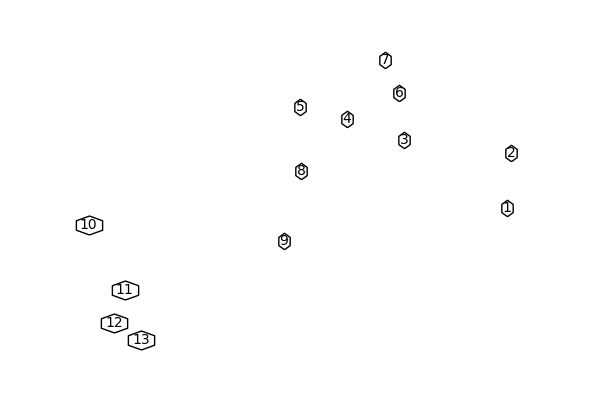

In [5]:
using PlotRecipes  # Pacote com a função para plotar grafos
# Pkg.add("PyPlot")  # Instalação do pacote para plotagem.

# Backend utilizado para plotagem:
pyplot()  # Melhor visualização, mas possui mais dependências.
# plotly()  # Mais simples.

# Configuração do desenho
graphplot(1:nCities, 1:nCities, names=1:nCities,
    x=posX, y=posY, fontsize=10,
    m=:white, l=:black)

O primeiro passo para implementação do modelo é a inclusão dos pacotes computacionais que serão utilizados. Para esse exemplo, foi utilizado o pacote JuMP e o Gurobi. Em seguida, define-se o objeto modelo, no qual podem-se definir parâmetros para solução: foram limitados tempo de solução, número de processadores, desabilitadas as heurísticas do Gurobi -- é implementada uma heurística na Seção 4.3 -- e suprimida a impressão de informações sobre o processo de solução. Com o modelo, definem-se as variáveis, a função objetivo e as restrições do problema, respectivamente. Note o uso da sintaxe para a definição de variáveis matriciais e a função <i>sum</i> como atalho para a definição de somatórios.

In [6]:
using JuMP
using Gurobi
# using CPLEX

# Definição do modelo e parâmetros para a solução: 
model = Model(solver=GurobiSolver(TimeLimit=20, Threads=1, 
        Heuristics=0.0, OutputFlag=0))

# Para o CPLEX pode-se usar:
# model = Model(solver=CplexSolver(CPX_PARAM_TILIM=20, 
#         CPX_PARAM_THREADS=1, CPX_PARAM_HEURFREQ=0,
#         CPX_PARAM_SCRIND=0))

# Definição da variável matricial xij.
# Note que a variável nCities foi definida anteriormente.
@variable(model, x[i=1:nCities, j=1:nCities; i != j], Bin)

# Função objetivo:
@objective(model, Min, sum(c[i, j] * x[i, j]
        for i in 1:nCities, j in 1:nCities if i != j))

# Restrições para garantir a saída de todo vértice:
for i in 1:nCities
    @constraint(model, sum(x[i, j] for j in 1:nCities if i != j) == 1)
end 

# Restrições para garantir a chegada em cada vértice:
for j in 1:nCities
    @constraint(model, sum(x[i, j] for i in 1:nCities if i != j) == 1)
end

A solução é obtida pela chamada do método <i>solve</i> e pode-se utilizar Julia para visualizar a solução.

In [7]:
status = solve(model)

if status == :Optimal
    edgeOrigin = []
    edgeDest = []

    for i in keys(citiesDict)
        for j in keys(citiesDict)
            if i != j && getvalue(x[i, j]) > 0.99
                append!(edgeOrigin, i)
                append!(edgeDest, j)
            end
        end
    end
else
    println("Solução ótima não encontrada!")
end

Academic license - for non-commercial use only



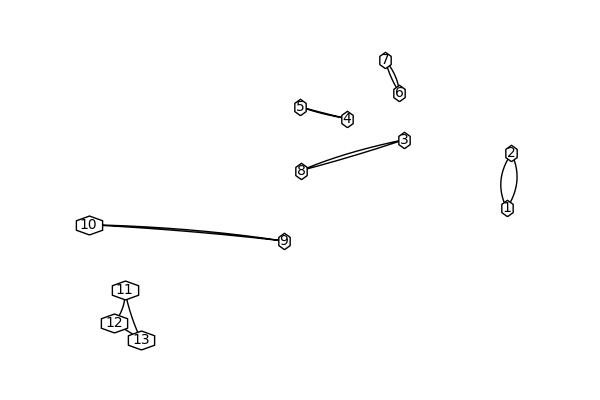

In [8]:
# Visualizando a solução: 
display(
        graphplot(
            edgeOrigin, edgeDest, names=1:nCities, 
            x=posX, y=posY, fontsize=10,
            m=:white, l=:black
        )
    )

Devido a ausência das restrições de eliminação de subciclo, a solução não corresponde a uma rota desejada. Uma desvantagem das restrições de eliminação de subciclos apresentadas é o seu número exponencial em relação ao número de pontos a serem visitados. Por isso, enumerar todas essas restrições <i>a priori</i> é factível apenas para exemplos com poucos pontos e uma abordagem mais eficiente é adicionar restrições apenas quando são necessárias. Na sequência, é utilizada a <i>callback</i> de <i>lazy constraints</i> da JuMP para inclusão das restrições de eliminação de subciclo de forma eficiente. 

# <i>Callbacks</i>

<i>Callbacks</i> são funções que permitem ao usuário personalizar o procedimento do resolvedor. Em geral, são utilizadas para explorar características específicas dos problemas ou obter informações detalhadas sobre andamento do processo de solução. No momento da escrita deste artigo, JuMP dispunha de três <i>callbacks</i> para customização, que são apresentadas nas Subseçõs 4.1-4.3, além de <i>callbacks</i> informativas -- que possuem o uso relativamente simples. Informações detalhadas sobre essa funcionalidade podem ser encontradas na documentação oficial da JuMP (http://www.juliaopt.org/JuMP.jl/0.17/). Ainda, destaca-se que o comportamento específico de cada uma das <i>callbacks</i> pode depender do resolvedor utilizado e recomenda-se consultar seu respectivo manual. Inclusive, a número de resolvedores que suportam seu uso é limitado (Gurobi, CPLEX, GLPK e SCIP eram os suportados no momento da escrita deste artigo).

## <i>Lazy constraints</i>

Uma das utilidades da <i>callback lazy constraints</i> é em casos em que o conjunto completo de restrições é muito numeroso para ser explicitado. Para utilizar essa <i>callback</i>, é necessário implementar uma função que é chamada sempre que o resolvedor encontrar uma solução inteira, permitindo, então, a adição de restrições ao modelo. Como exemplo, segue uma implementação de função que identifica o menor subciclo presente na solução do caixeiro viajante apresentada anteriormente e, caso ele exista, adiciona uma restrição que o elimina. Note que é possível utilizar outros pacotes de Julia dentro de uma <i>callback</i>, como foi feito no exemplo com o pacote <i>Graphs</i>, permitindo uma manipulação simples do grafo da solução.


In [9]:
using Graphs

function lazyConstraintsCallback(cb)

    # Criando um grafo:
    g = simple_graph(nCities, is_directed=false)

    for i in 1:nCities, j in 1:nCities
        if i != j
            if getvalue(x[i, j]) > 0.01
                add_edge!(g, i, j)  # Adicionando as arestas.
            end
        end
    end

    # Encontrando os componentes conexos do grafo:
    cc = connected_components(g)

    if length(cc) > 1
        # Caso só haja uma componente conexa
        # não há subciclo e não se adiciona 
        # nenhuma restrição.
        
        minTour = sort(cc, by=length)[1]
        subtourLhs = AffExpr()
        
        # Encontrando as arestas que fazem parte do subciclo
        for i in minTour
            for j in minTour
                if i != j && getvalue(x[i, j]) > 0.01
                    subtourLhs += x[i, j]
                end 
            end
        end
        
        # Adicionando a restrição:
        @lazyconstraint(cb, subtourLhs <= length(minTour) - 1)
    end
end # End function

lazyConstraintsCallback (generic function with 1 method)

Com a função de inclução de restrições de eliminação de subciclo, o único passo necessário, além da implementação do modelo, é informar que o resolvedor deve considerar função correta para <i>callback</i>. Isso deve ser feito antes da chamada do método <i>solve</i>. Como feito a seguir:

Academic license - for non-commercial use only



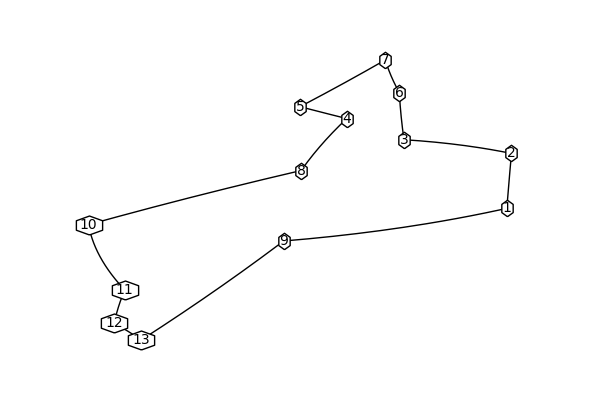

In [10]:
# [... Código com a implementação do modelo ...]

addlazycallback(model, lazyConstraintsCallback)

solve(model)

edgeOrigin = []
edgeDest = []

for i in keys(citiesDict)
    for j in keys(citiesDict)
        if i != j && getvalue(x[i, j]) > 0.01
            append!(edgeOrigin, i)
            append!(edgeDest, j)
        end
    end
end

graphplot(edgeOrigin, edgeDest, names=1:nCities,
    x=posX, y=posY, fontsize=10, m=:white, l=:black)

No caso do Gurobi, é possível visualizar o número de restrições adicionadas durante o processo de resolução. As informações disponíveis podem variar de acordo com o pacote computacional utilizado e podem ser consultadas no respectivo manual.

## <i> User cuts</i>

A <i>callback user cuts</i> pode ser interessante caso o usuário conheça desigualdades válidas (cortes) para o seu problema e seja custoso adicioná-las <i>a priori</i>. Essa <i>callback</i> é chamada sempre que o resolvedor encontra uma solução ótima para a relaxação linear do problema. Embora chamada em momento diferente, a sua implementação é semelhante ao caso de <i>lazy constraints</i>.

In [11]:
using Graphs

function userCutsCallback(cb)

    # Criando um grafo:
    g = simple_graph(nCities, is_directed=false)

    for i in 1:nCities, j in 1:nCities
        if i != j
            if getvalue(x[i, j]) > 0.01
                add_edge!(g, i, j)  # Adicionando as arestas.
            end
        end
    end

    # Encontrando os componentes conexos do grafo:
    cc = connected_components(g)

    minTour = sort(cc, by=length)[1]
    subtourLhs = AffExpr()

    # Encontrando as arestas que fazem parte do subciclo
    countEdges = 0
    for i in minTour
        for j in minTour
            if i != j && getvalue(x[i, j]) > 0.01
                subtourLhs += x[i, j]
                countEdges += 1
            end 
        end
    end

    # Adicionando a restrição:
    if length(cc) > 1
        @usercut(cb, subtourLhs <= length(minTour) - 1)
    elseif countEdges > length(vertices(g))
        @usercut(cb, subtourLhs == length(vertices(g)))
    end
    
end # End function

userCutsCallback (generic function with 1 method)

É importante destacar que as restrições adicionadas utilizando <i>user cuts</i> não devem alterar o conjunto de soluções factíveis do problema original, elas têm a função, apenas, de melhorar o limitante dual do problema. Portanto, para o exemplo do caixeiro viajante aqui apresentado, é necessário utilizar as duas <i>callbacks</i>.

In [12]:
addcutcallback(model, userCutsCallback)
addlazycallback(model, lazyConstraintsCallback)

solve(model)

Academic license - for non-commercial use only


:Optimal

## <i> User heuristics</i>

A <i>callback user heuristics</i> permite que sejam submetidas soluções heurísticas para o resolvedor. O comportamento específico dessa <i>callback</i> depende do resolvedor que está sendo utilizado e é necessário consultar o respectivo manual. Para o exemplo do caixeiro viajante, considere uma heurística que inclui na rota arestas correspondentes as variáveis com valores no intervalo (0,1; 1]. Isto é, atribui 1 a variáveis cuja a solução da relaxação é maior do que 0,1. Essa procedimento constrói uma solução candidata, que é submetida ao Gurobi, caso ela seja factível, ela é incluída nas soluções encontradas até o momento, caso contrário ela é desconsiderada. Esse procedimento pode ser implementado da seguinte maneira:

In [13]:
function userHeuristicsCallback(cb)
    for i in 1:nCities, j in 1:nCities
        if i != j
            if  getvalue(x[i, j]) > 0.1
                # Atribuindo um valor à variável:
                setsolutionvalue(cb, x[i, j], 1)
            end            
        end
    end
    
    # Submetendo solução:
    addsolution(cb)                    
    
end

userHeuristicsCallback (generic function with 1 method)

Para o exemplo, foram atribuídos valores a todas as variáveis do problema. Isso não é uma exigência, pode-se submeter uma solução parcial, atribuindo valores à apenas algumas variáveis. Novamente, o tratamento dos valores restantes depende do resolvedor. Para utilizar a função implementada como <i>callback</i> procede-se de maneira semelhante aos casos anteriores, podendo-se, inclusive, utilizar outras <i>callbacks</i> simultanetamente.

In [14]:
addcutcallback(model, userCutsCallback)
addlazycallback(model, lazyConstraintsCallback)
addheuristiccallback(model, userHeuristicsCallback)

solve(model)

Academic license - for non-commercial use only


:Optimal

# Conclusões e recursos adicionais

Julia e JuMP são ferramentas computacionais recentes que se aproveitam das vantagens de diferentes linguagens de programação e pacotes computacioanis para melhorar o compromisso entre produtividade e eficiência computacional em relação às alternativas usuais. Embora, tanto Julia quanto JuMP, ainda não possuam uma versão 1.0 a comunidade científica tem mostrado interesse no uso e desenvolvimento de tais ferramentas (vide, por exemplo, https://julialang.org/teaching, https://julialang.org/publications e https://github.com/pedrocastellucci/MathematicalProgrammingCourse). Este tutorial tenta chamar atenção da comunidade científica e demais interessados, principalmente dos programadores matemáticos, para a linguagem Julia e mais especificamente para a biblioteca JuMP.

Além das referências já mencionadas ao longo do texto, o leitor é referido ao livro Julia Programming for Operations Research: A Primer on Computing. Ao canal https://www.youtube.com/user/JuliaLanguage, onde podem ser encontradas palestras das conferências anuais de Julia (JuliaCon, realizada desde 2014) com conteúdos básicos e avançados da própria linguagem e de suas bibliotecas.